<a href="https://colab.research.google.com/github/daniel-nuno/IDI-I/blob/master/autoets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: ETS
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 28 de octubre 2024 <br>

* * *

<br>
<br>

# ETS

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()

,year,value
0,1960-01-01,69.123902
1,1961-01-01,69.760244
2,1962-01-01,69.149756
3,1963-01-01,69.248049
4,1964-01-01,70.311707


## Unique ID statsforecast

In [ ]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1960-01-01,69.123902,1
1,1961-01-01,69.760244,1
2,1962-01-01,69.149756,1
3,1963-01-01,69.248049,1
4,1964-01-01,70.311707,1


In [ ]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [ ]:
df["ds"] = pd.to_datetime(df["ds"])

In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


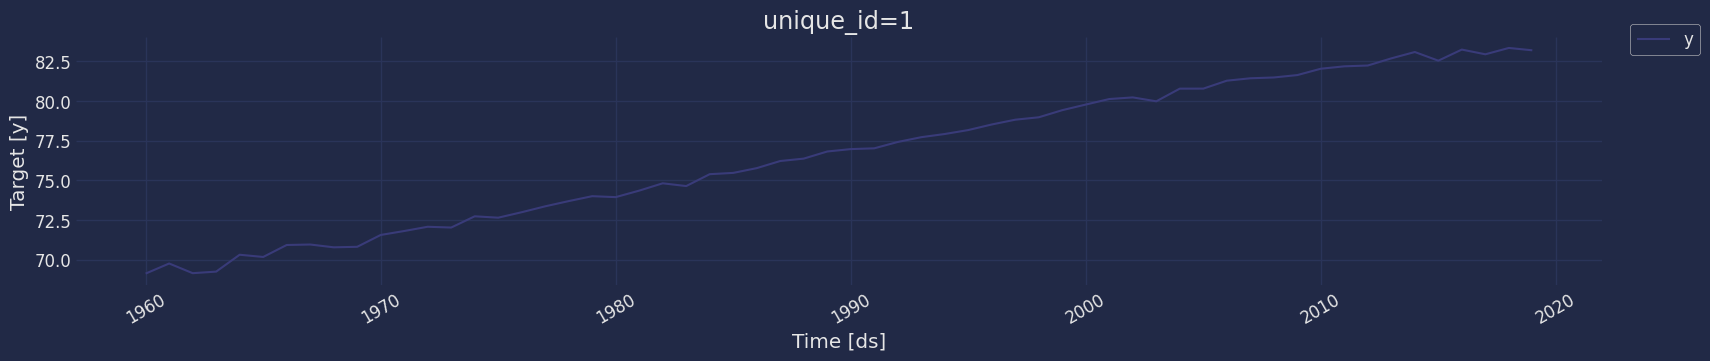

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

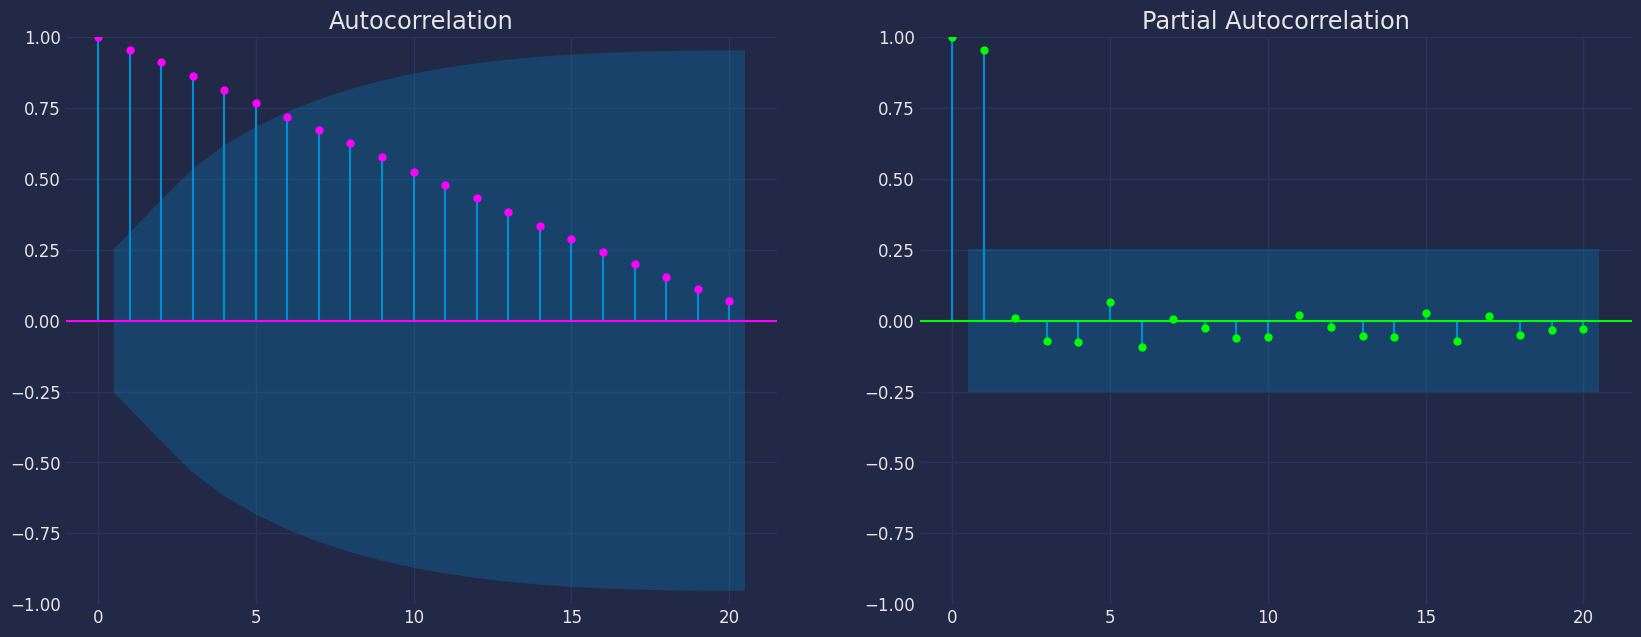

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

## Series temporales aditivas
Si los componentes de la serie temporal se suman para formar la serie temporal. Entonces la serie temporal se denomina serie temporal aditiva. Por visualización, podemos decir que **la serie temporal es aditiva si el patrón creciente o decreciente de la serie temporal es similar en toda la serie**. La función matemática de cualquier serie temporal aditiva puede representarse mediante:

$$ y(t)= level + trend + seasonality + noise $$

## Series temporales multiplicativas
Si los componentes de la serie temporal son multiplicativos entre sí, la serie temporal se denomina serie temporal multiplicativa. Para su visualización, **si la serie temporal tiene un crecimiento exponencial o decrece con el tiempo, entonces la serie temporal puede considerarse como una serie temporal multiplicativa**. La función matemática de la serie temporal multiplicativa puede representarse como:

$$ y(t)= level * trend * seasonality * noise $$

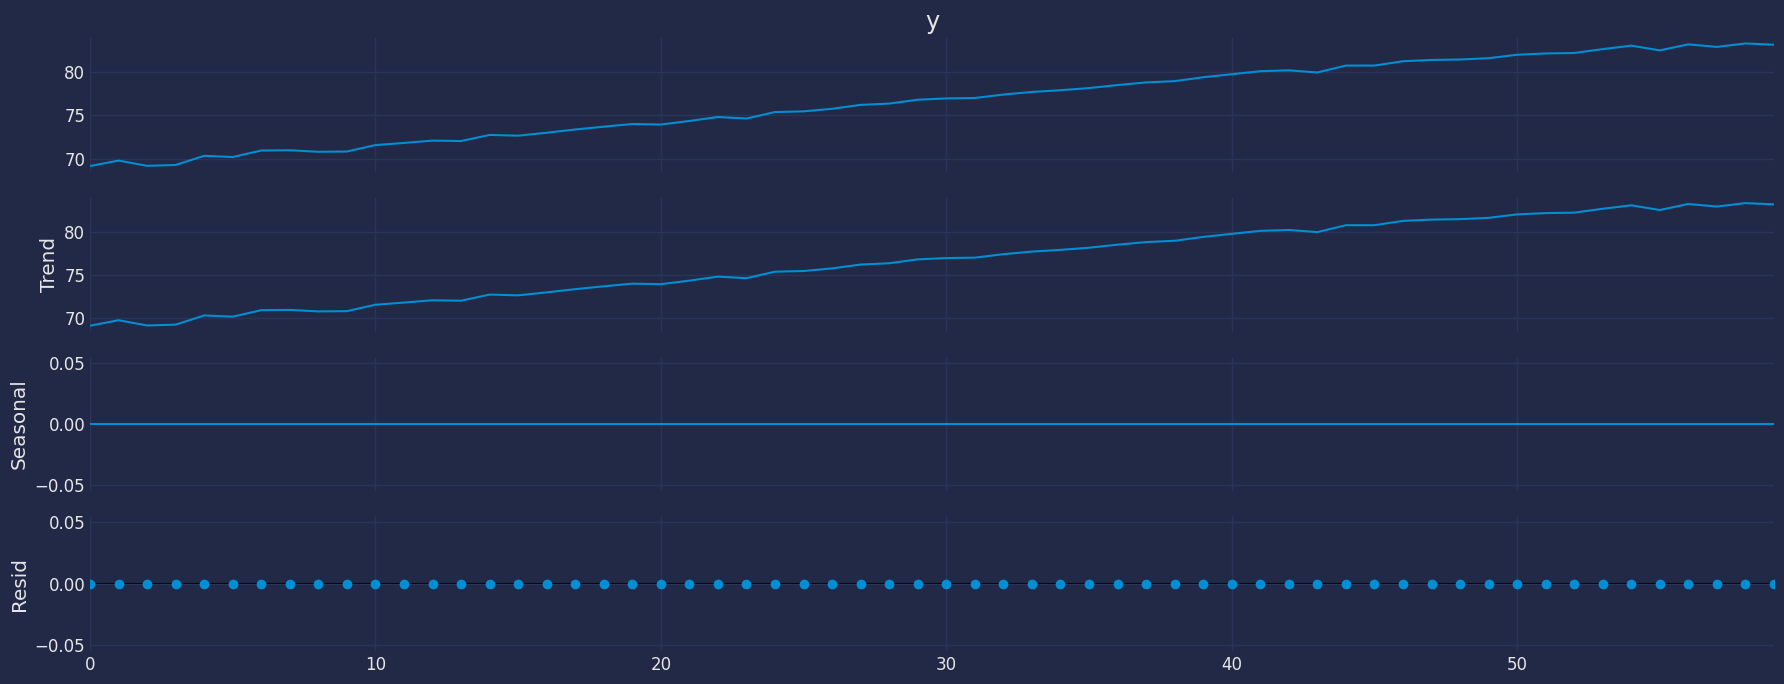

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=1)
a.plot();

## Datos entrenamientos y prueba

In [ ]:
train = df[df.ds<='2013-01-01']
test = df[df.ds>'2013-01-01']

In [ ]:
train.shape, test.shape

((54, 3), (6, 3))

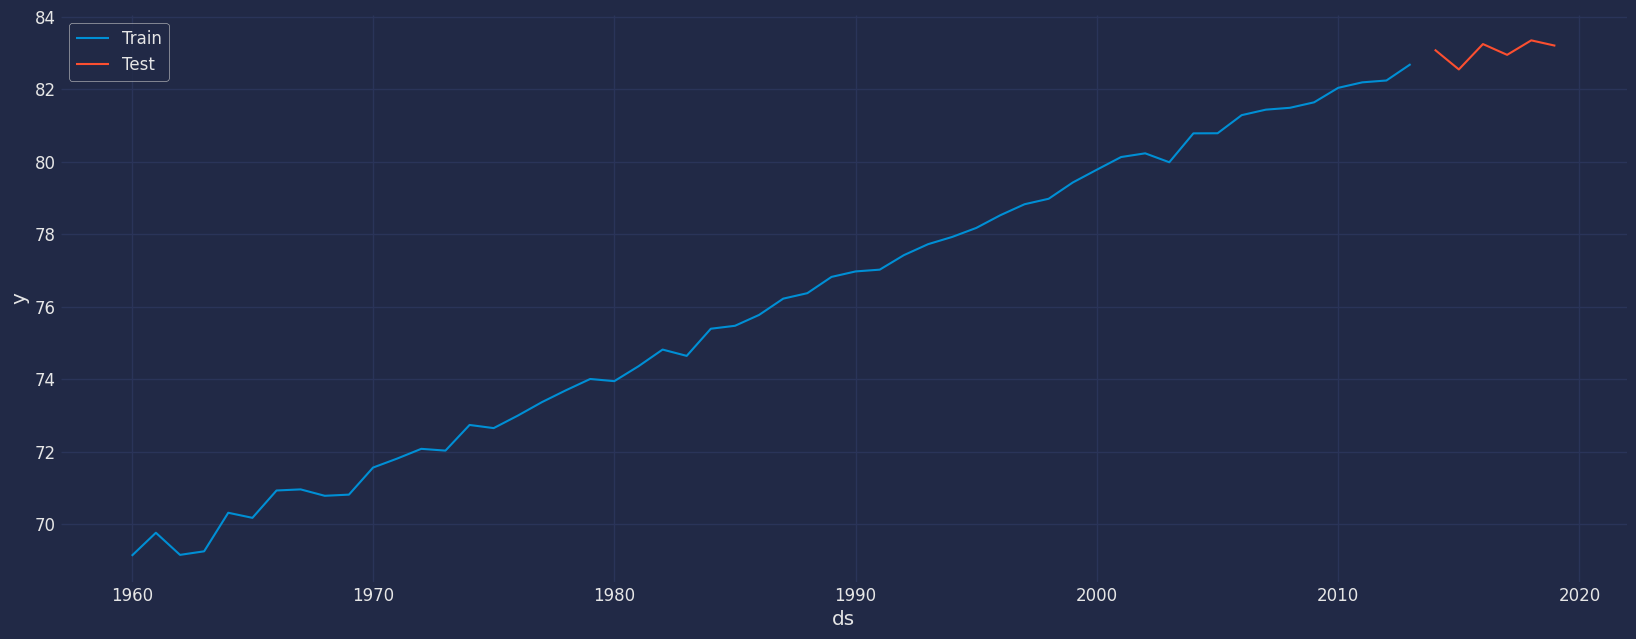

In [ ]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

## Implementación AutoETS

Selecciona automáticamente el mejor modelo ETS (Error, Tendencia, Estacionalidad) utilizando un criterio de información. Por defecto es el Criterio de Información de Akaike (AICc), mientras que los modelos particulares se estiman utilizando la máxima verosimilitud.

Por ejemplo, cuando el modelo='ANN' (error aditivo, sin tendencia y sin estacionalidad), ETS explorará sólo un suavizado exponencial simple.

Si el componente se selecciona como 'Z', funciona como un marcador de posición para pedir al modelo AutoETS que averigüe el mejor parámetro.

In [ ]:
from statsforecast.models import AutoETS

In [ ]:
autoets = AutoETS(model=["A","Z","N"],  alias="AutoETS", season_length=1)

In [ ]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [ ]:
y_hat_dict = autoets.predict(h=6)
y_hat_dict

{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784])}

In [ ]:
forecast=pd.Series(pd.date_range("2014-01-01", freq="YS", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast

,ds,hat,unique_id
0,2014-01-01,83.569371,1
1,2015-01-01,83.656960,1
2,2016-01-01,83.744550,1
3,2017-01-01,83.832139,1
4,2018-01-01,83.919728,1
5,2019-01-01,84.007318,1


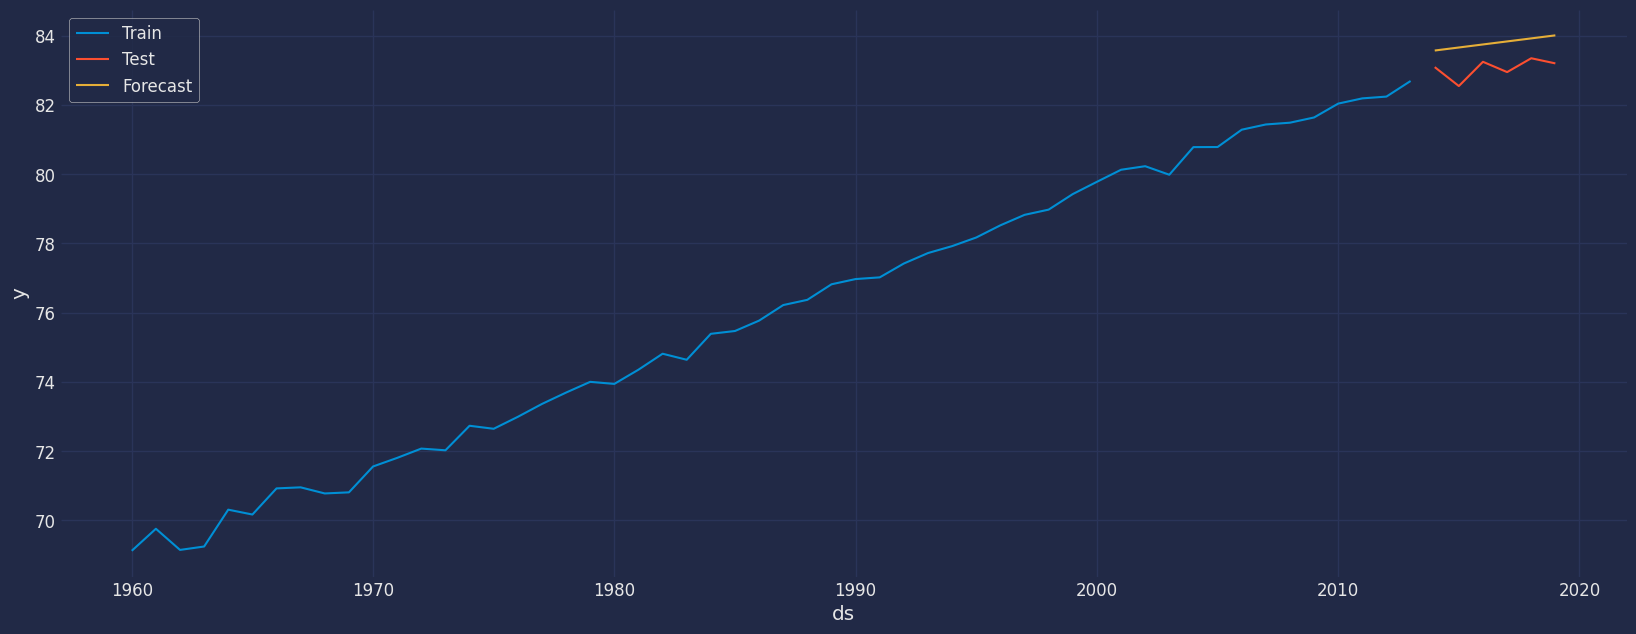

In [ ]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [ ]:
y_hat_dict = autoets.predict(h=6, level=[80,90,95])
y_hat_dict

{'mean': array([83.56937105, 83.65696041, 83.74454977, 83.83213913, 83.91972848,
        84.00731784]),
 'lo-95': array([83.09409059, 83.17958519, 83.25889648, 83.32836493, 83.3852606 ,
        83.42814393]),
 'lo-90': array([83.17050311, 83.2563345 , 83.33697668, 83.40935849, 83.4711889 ,
        83.52125977]),
 'lo-80': array([83.25860186, 83.34482153, 83.42699815, 83.50273888, 83.57025872,
        83.62861638]),
 'hi-80': array([83.88014025, 83.96909929, 84.06210139, 84.16153937, 84.26919825,
        84.38601931]),
 'hi-90': array([83.96823899, 84.05758633, 84.15212286, 84.25491976, 84.36826807,
        84.49337591]),
 'hi-95': array([84.04465152, 84.13433563, 84.23020306, 84.33591332, 84.45419637,
        84.58649176])}

In [ ]:
y_hat_dict.keys()

dict_keys(['mean', 'lo-95', 'lo-90', 'lo-80', 'hi-80', 'hi-90', 'hi-95'])

In [ ]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2014-01-01,83.569371,1,83.258602,83.880140,83.258602,83.880140,83.094091,84.044652
1,2015-01-01,83.656960,1,83.344822,83.969099,83.344822,83.969099,83.179585,84.134336
2,2016-01-01,83.744550,1,83.426998,84.062101,83.426998,84.062101,83.258896,84.230203
3,2017-01-01,83.832139,1,83.502739,84.161539,83.502739,84.161539,83.328365,84.335913
4,2018-01-01,83.919728,1,83.570259,84.269198,83.570259,84.269198,83.385261,84.454196
5,2019-01-01,84.007318,1,83.628616,84.386019,83.628616,84.386019,83.428144,84.586492


In [ ]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")

In [ ]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

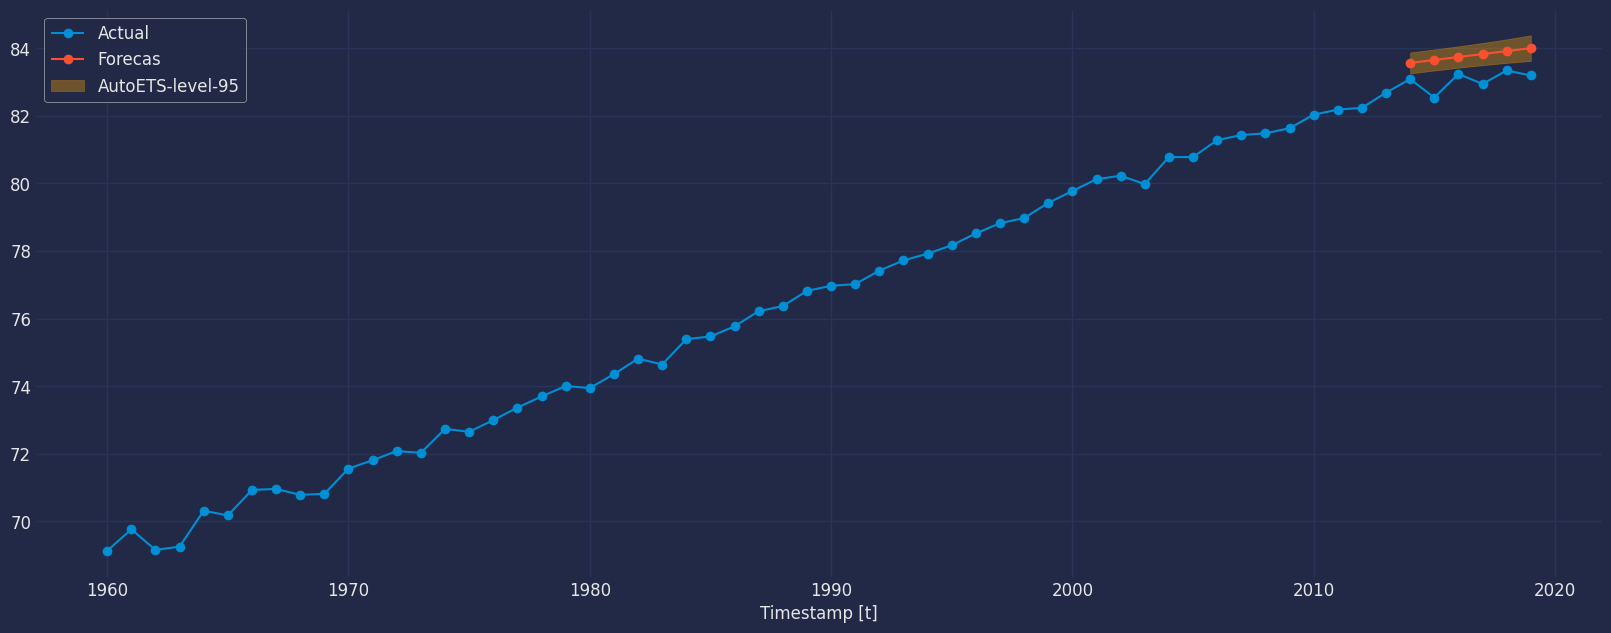

In [ ]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index,
                df_plot['lo-80'],
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [ ]:
autoets.predict_in_sample()

{'fitted': array([69.11047128, 69.33779313, 69.60481978, 69.82902341, 69.99867608,
        70.19782129, 70.39447403, 70.6410976 , 70.91730954, 71.18057737,
        71.40921444, 71.65195408, 71.90923238, 72.18210689, 72.44032072,
        72.72619326, 73.00461648, 73.28185885, 73.56688287, 73.86376672,
        74.17369207, 74.4619337 , 74.74004938, 75.02518845, 75.27413727,
        75.53397698, 75.78785822, 76.0401374 , 76.30927822, 76.58417332,
        76.88118063, 77.18657633, 77.47625869, 77.76062769, 78.04136835,
        78.31088961, 78.56725183, 78.81937322, 79.07197167, 79.31551239,
        79.56929831, 79.84269161, 80.14276586, 80.45093604, 80.71510722,
        80.98548038, 81.23680745, 81.49249391, 81.74269063, 81.96870832,
        82.16354077, 82.34648092, 82.51452241, 82.65668891, 82.80204272,
        82.97448067, 83.1064133 , 83.2513209 , 83.36754658, 83.4818162 ])}

In [ ]:
autoets.forecast(y=train["y"].values, h=6, fitted=True)

{'mean': array([82.95255312, 83.14614994, 83.33974676, 83.53334358, 83.7269404 ,
        83.92053722]),
 'fitted': array([69.00530476, 69.23734594, 69.49576257, 69.73666618, 69.95294699,
        70.187381  , 70.42098819, 70.68008659, 70.9530876 , 71.21732635,
        71.4611257 , 71.70989361, 71.96354347, 72.2228266 , 72.4721832 ,
        72.73479137, 72.99295904, 73.25108461, 73.51494039, 73.78777897,
        74.07144455, 74.34861549, 74.62606605, 74.91303191, 75.18621304,
        75.46968067, 75.753181  , 76.0375669 , 76.33113266, 76.62667854,
        76.93195155, 77.23916225, 77.53528475, 77.8255869 , 78.1106708 ,
        78.38624159, 78.65095585, 78.90918162, 79.1631414 , 79.40764614,
        79.6530146 , 79.90469107, 80.16756493, 80.43353035, 80.67675051,
        80.9252507 , 81.16655833, 81.41375257, 81.66196432, 81.90126223,
        82.12722125, 82.34863292, 82.56193769, 82.75896317])}

In [ ]:
autoets.forecast(y=train["y"].values, h=6, fitted=True, level=[95])

{'mean': array([82.95255312, 83.14614994, 83.33974676, 83.53334358, 83.7269404 ,
        83.92053722]),
 'fitted': array([69.00530476, 69.23734594, 69.49576257, 69.73666618, 69.95294699,
        70.187381  , 70.42098819, 70.68008659, 70.9530876 , 71.21732635,
        71.4611257 , 71.70989361, 71.96354347, 72.2228266 , 72.4721832 ,
        72.73479137, 72.99295904, 73.25108461, 73.51494039, 73.78777897,
        74.07144455, 74.34861549, 74.62606605, 74.91303191, 75.18621304,
        75.46968067, 75.753181  , 76.0375669 , 76.33113266, 76.62667854,
        76.93195155, 77.23916225, 77.53528475, 77.8255869 , 78.1106708 ,
        78.38624159, 78.65095585, 78.90918162, 79.1631414 , 79.40764614,
        79.6530146 , 79.90469107, 80.16756493, 80.43353035, 80.67675051,
        80.9252507 , 81.16655833, 81.41375257, 81.66196432, 81.90126223,
        82.12722125, 82.34863292, 82.56193769, 82.75896317]),
 'lo-95': array([82.50041572, 82.69343721, 82.88474449, 83.07323487, 83.25789375,
        83.4

In [ ]:
from sklearn import metrics

def model_evaluation(y_true, y_pred, model):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')

In [ ]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")


Model Evaluation: AutoETS
MSE is : 0.5813708311034599
MAE is : 0.7269623342641888
RMSE is : 0.7624767741403405
MAPE is : 0.8759446710136674
R2 is : -7.40712892940391
corr is : 0.4910418089228503



In [ ]:
# prompt: mount google drive into collaboration file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx")

In [ ]:
data.head()

,Fecha,Value
0,1995-01-01,254.5724
1,1995-02-01,248.0605
2,1995-03-01,287.3645
3,1995-04-01,298.9135
4,1995-05-01,357.7396


In [ ]:
df = pd.DataFrame({"ds": data["Fecha"], "y": data["Value"], "unique_id": "Remesas"})
df.head()

,ds,y,unique_id
0,1995-01-01,254.5724,Remesas
1,1995-02-01,248.0605,Remesas
2,1995-03-01,287.3645,Remesas
3,1995-04-01,298.9135,Remesas
4,1995-05-01,357.7396,Remesas


In [ ]:
df.dtypes

,0
ds,datetime64[ns]
y,float64
unique_id,int64


In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 12.7 MB/s eta 0:00:00


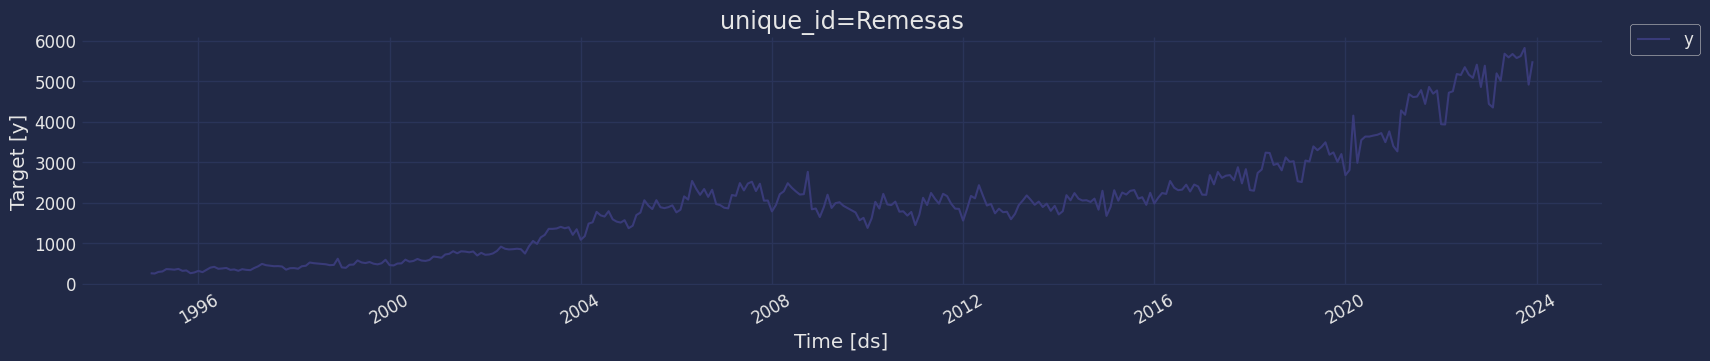

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

Mi serie presenta tendencia que crece en los últimos periodos por lo tanto es aditiva (A).
Presenta estacionalidad y es creciente y variable a traves del tiempo (M).

En los errores estoy indeciso pero es irrelevante para los pronósticos puntuales.

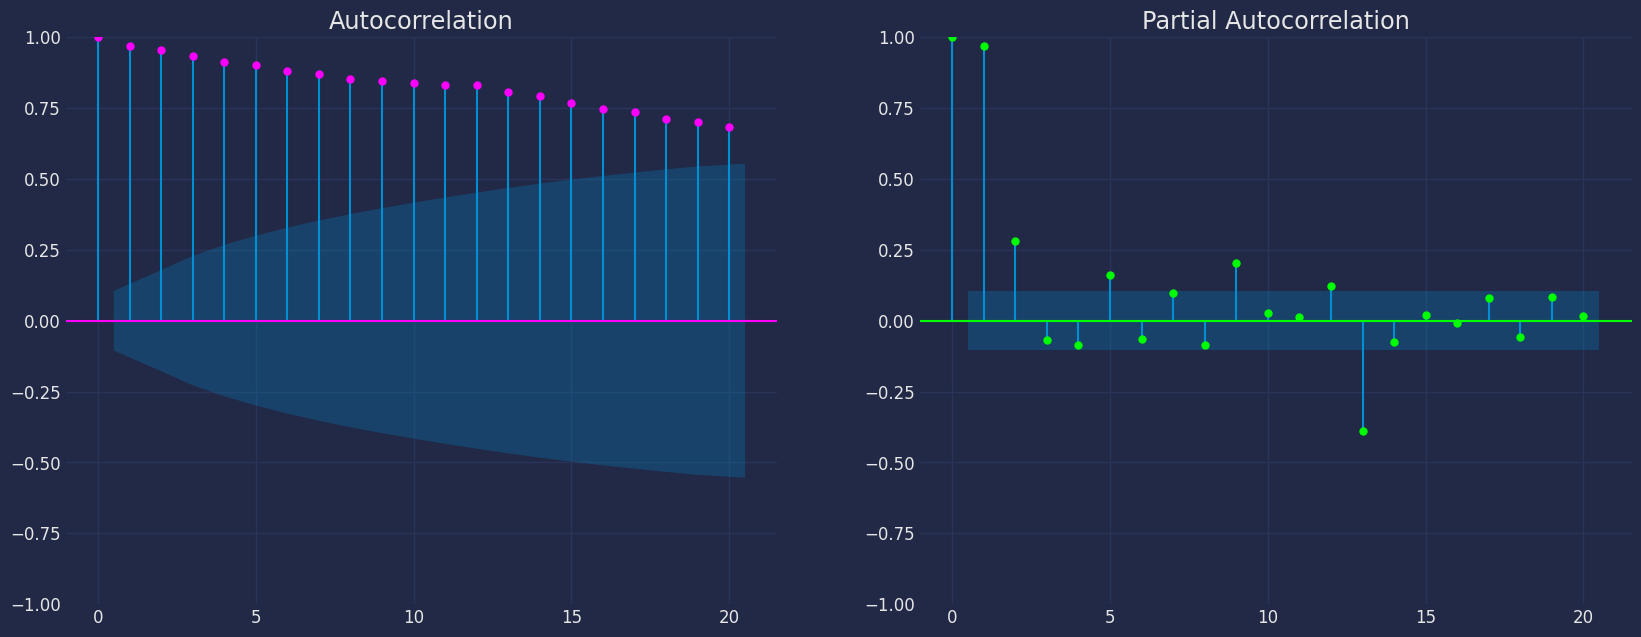

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

Atención particularmente a los rezagos 1, 2, 5, 9, 12, 13 porqué están fuera de la línea sombreada.

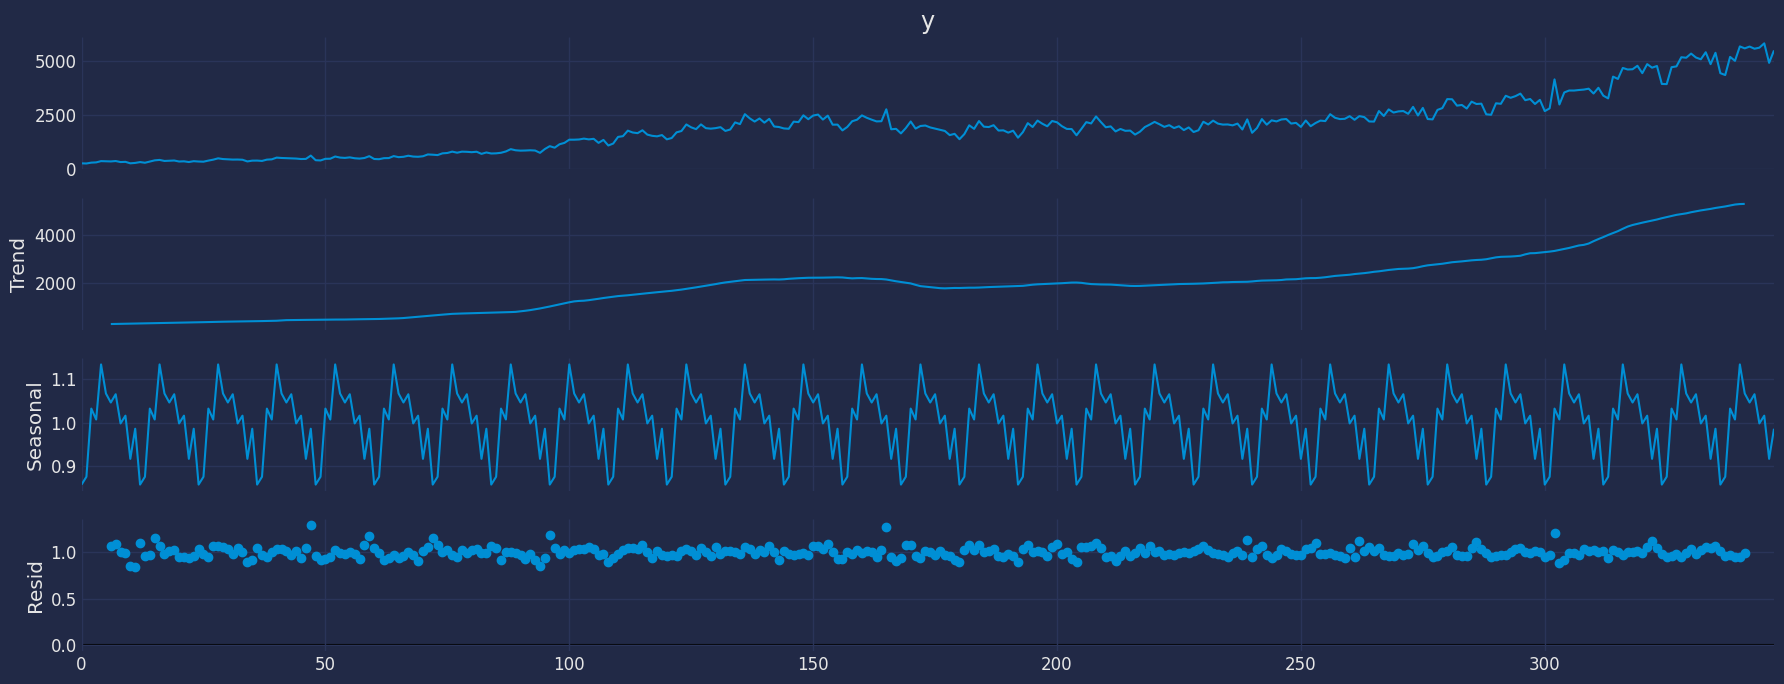

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "mul", period=12)
a.plot();

In [ ]:
train = df[df.ds<='2023-01-01']
test = df[df.ds>'2023-01-01']

In [ ]:
test.shape, train.shape

((11, 3), (337, 3))

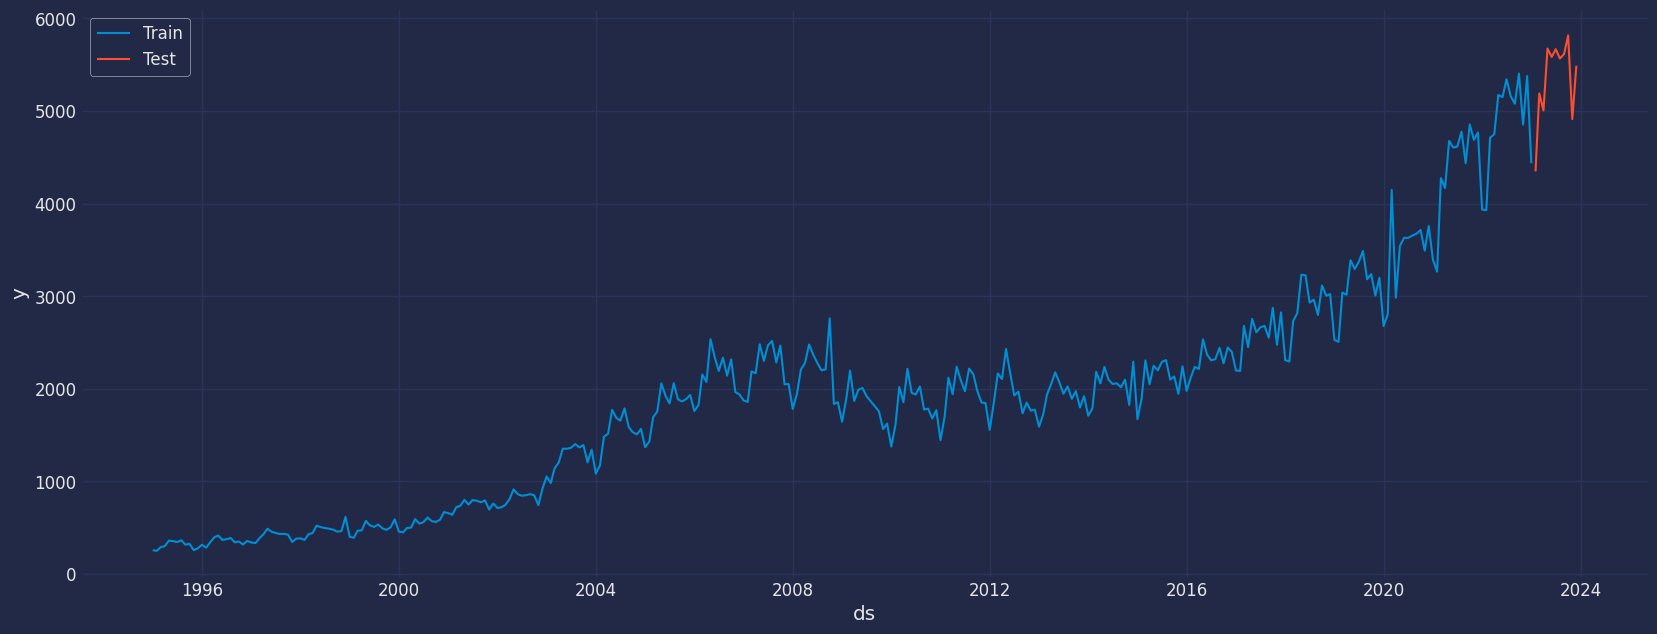

In [ ]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

In [ ]:
from statsforecast.models import AutoETS

In [ ]:
autoets.model

['M', 'A', 'M']

In [ ]:
autoets.model_.keys()

dict_keys(['loglik', 'aic', 'bic', 'aicc', 'mse', 'amse', 'fit', 'residuals', 'components', 'm', 'nstate', 'fitted', 'states', 'par', 'sigma2', 'n_params', 'method', 'actual_residuals'])

In [ ]:
autoets.model_['method']

12

In [ ]:
autoets = AutoETS(model=["Z","Z","Z"],  alias="AutoETS", season_length=12)

In [ ]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [ ]:
y_hat_dict = autoets.predict(h=len(test))
y_hat_dict

{'mean': array([4737.45494054, 4771.5730659 , 5624.48661474, 5618.34851088,
        6171.15132386, 5834.84462629, 5703.26564305, 5792.59905881,
        5431.60649765, 5508.00711868, 4981.34479006])}

In [ ]:
test.head()

,ds,y,unique_id
337,2023-02-01,4347.2494,Remesas
338,2023-03-01,5189.7692,Remesas
339,2023-04-01,5006.6693,Remesas
340,2023-05-01,5675.5604,Remesas
341,2023-06-01,5584.4429,Remesas


In [ ]:
forecast=pd.Series(pd.date_range("2023-02-01", freq="MS", periods=len(test)))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="Remesas"
forecast

,ds,hat,unique_id
0,2023-02-01,4737.454941,Remesas
1,2023-03-01,4771.573066,Remesas
2,2023-04-01,5624.486615,Remesas
3,2023-05-01,5618.348511,Remesas
4,2023-06-01,6171.151324,Remesas
5,2023-07-01,5834.844626,Remesas
6,2023-08-01,5703.265643,Remesas
7,2023-09-01,5792.599059,Remesas
8,2023-10-01,5431.606498,Remesas
9,2023-11-01,5508.007119,Remesas


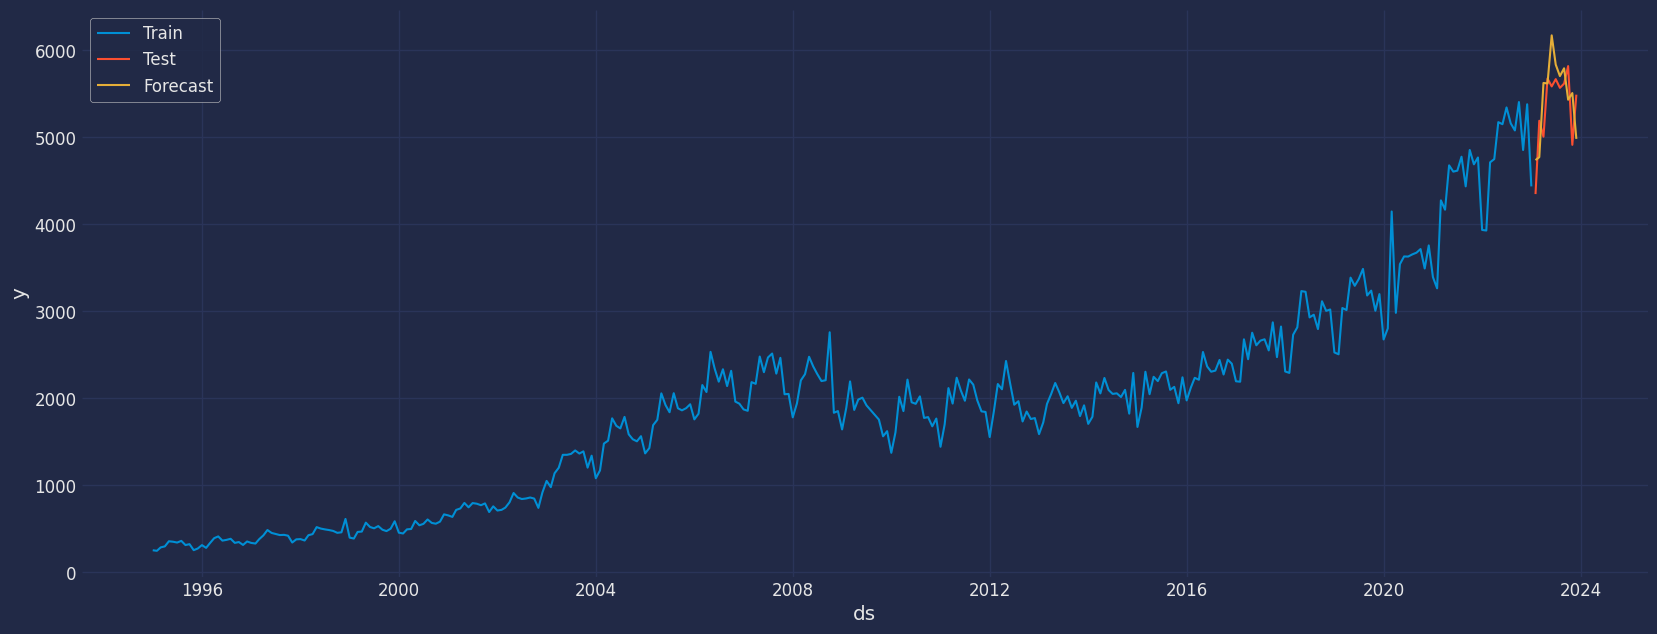

In [ ]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [ ]:
y_hat_dict = autoets.predict(h=len(test), level=[80,90,95])
y_hat_dict

{'mean': array([4737.45494054, 4771.5730659 , 5624.48661474, 5618.34851088,
        6171.15132386, 5834.84462629, 5703.26564305, 5792.59905881,
        5431.60649765, 5508.00711868, 4981.34479006]),
 'lo-95': array([3991.50474005, 3995.11400185, 4807.50531967, 4762.8244988 ,
        5271.29874762, 4897.11616759, 4730.70916225, 4785.35810989,
        4394.81223554, 4441.66079881, 3891.41084937]),
 'lo-90': array([4111.43379807, 4119.94807802, 4938.85429856, 4900.37012693,
        5415.97123615, 5047.87809601, 4887.07051524, 4947.29580777,
        4561.50132434, 4613.1010767 , 4066.64339267]),
 'lo-80': array([4249.70432124, 4263.87377297, 5090.29125912, 5058.95142722,
        5582.76935004, 5221.6969441 , 5067.34514125, 5133.99960231,
        4753.68316832, 4810.76073741, 4268.67529253]),
 'hi-80': array([5225.20555984, 5279.27235883, 6158.68197037, 6177.74559455,
        6759.53329768, 6447.99230848, 6339.18614484, 6451.19851531,
        6109.52982698, 6205.25349996, 5694.01428759]),
 

In [ ]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2023-02-01,4737.454941,Remesas,4249.704321,5225.205560,4249.704321,5225.205560,3991.504740,5483.405141
1,2023-03-01,4771.573066,Remesas,4263.873773,5279.272359,4263.873773,5279.272359,3995.114002,5548.032130
2,2023-04-01,5624.486615,Remesas,5090.291259,6158.681970,5090.291259,6158.681970,4807.505320,6441.467910
3,2023-05-01,5618.348511,Remesas,5058.951427,6177.745595,5058.951427,6177.745595,4762.824499,6473.872523
4,2023-06-01,6171.151324,Remesas,5582.769350,6759.533298,5582.769350,6759.533298,5271.298748,7071.003900
5,2023-07-01,5834.844626,Remesas,5221.696944,6447.992308,5221.696944,6447.992308,4897.116168,6772.573085
6,2023-08-01,5703.265643,Remesas,5067.345141,6339.186145,5067.345141,6339.186145,4730.709162,6675.822124
7,2023-09-01,5792.599059,Remesas,5133.999602,6451.198515,5133.999602,6451.198515,4785.358110,6799.840008
8,2023-10-01,5431.606498,Remesas,4753.683168,6109.529827,4753.683168,6109.529827,4394.812236,6468.400760
9,2023-11-01,5508.007119,Remesas,4810.760737,6205.253500,4810.760737,6205.253500,4441.660799,6574.353439


In [ ]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")


KeyError: "None of ['ds'] are in the columns"

In [ ]:
df['unique_id'] = df['unique_id'].astype(object)
df_plot=df.merge(forecast, how='left', on=['unique_id', 'ds'])

In [ ]:
df_plot = df_plot[-24:]

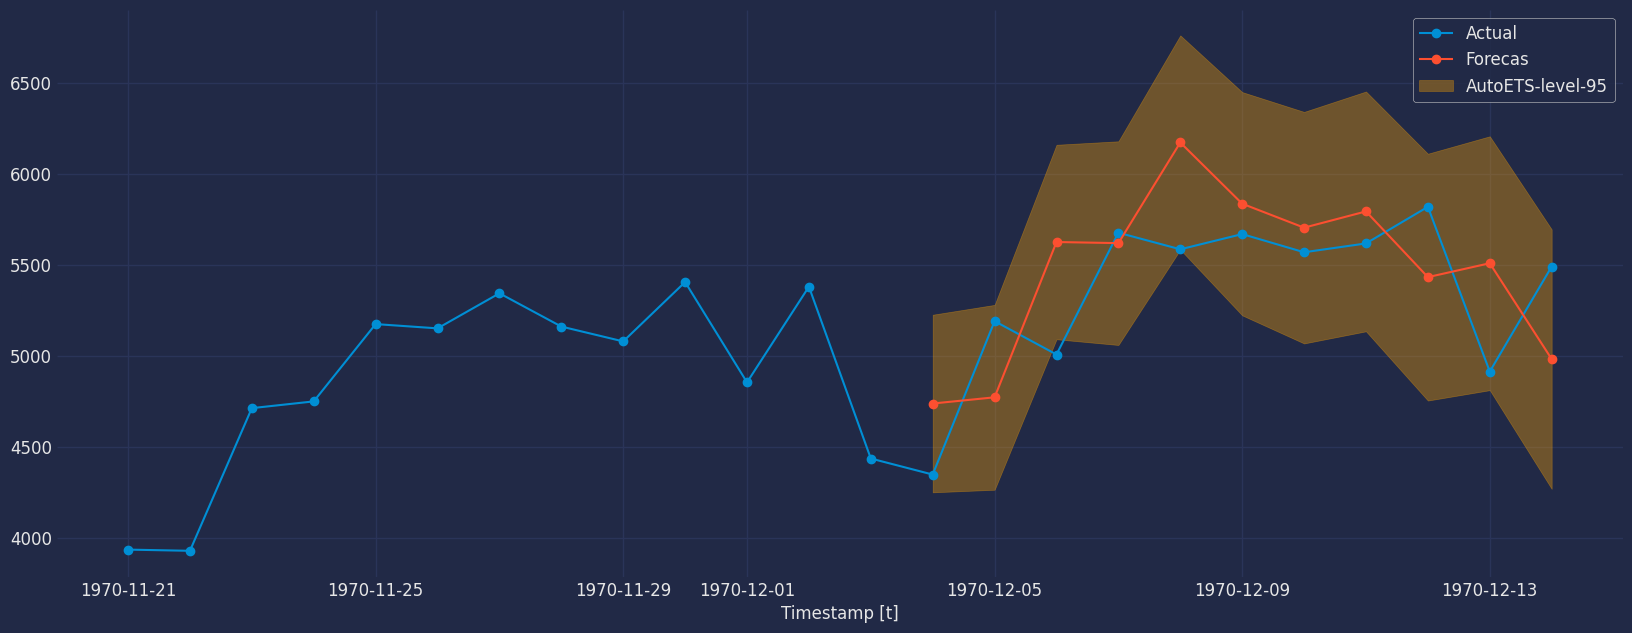

In [ ]:
fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index,
                df_plot['lo-80'],
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
def model_evaluation(y_true, y_pred, model):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [ ]:
model_evaluation(test["y"], forecast["hat"], "AutoETS")

Model Evaluation: AutoETS
MSE is : 172267.97358194002
MAE is : 367.04332377094846
RMSE is : 415.05177217058116
MAPE is : 7.036136351930017
R2 is : 0.03276739852505295
corr is : 0.5706835931050932

